In [1]:
# importar bibliotecas

# Pandas para manipulação de dados
import pandas as pd

# Numpy para cálculos numéricos
import numpy as np

# Matplotlib e seaborn para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações dos gráficos
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [3]:
# Carregando os dados de treino e teste
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Verificando os 5 primeiros registros do conjunto de treino
print("Dados de Treino:")
display(train_data.head())

# Verificando os 5 primeiros registros do conjunto de teste
print("\nDados de Teste:")
display(test_data.head())

Dados de Treino:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dados de Teste:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Verificar informações gerais sobre os dados

In [5]:
# Tamanho dos datasets
print(f"Tamanho dos dados de treino: {train_data.shape}")
print(f"Tamanho dos dados de teste: {test_data.shape}")

# Informações gerais sobre os dados
print("\nInformações do dataset de treino")
train_data.info()

Tamanho dos dados de treino: (891, 12)
Tamanho dos dados de teste: (418, 11)

Informações do dataset de treino
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explorar os dados
Verificar valores ausentes: Vamos identificar colunas com valores ausentes, pois isso pode impactar nosso modelo.

In [9]:
# Verificar valores ausentes no dataset de treino
print("Valores ausentes no dataset de treino:")
print(train_data.isnull().sum())

# Verificar valores ausentes no dataset de teste
print("\nValores ausentes no dataset de teste:")
print(test_data.isnull().sum())

Valores ausentes no dataset de treino:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores ausentes no dataset de teste:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Analisar a coluna-alvo (Survived): A coluna Survived é o que queremos prever (1 = Sobreviveu, 0 = Não sobreviveu). Vamos analisar como os dados estão distribuídos.


Distribuição da coluna 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64


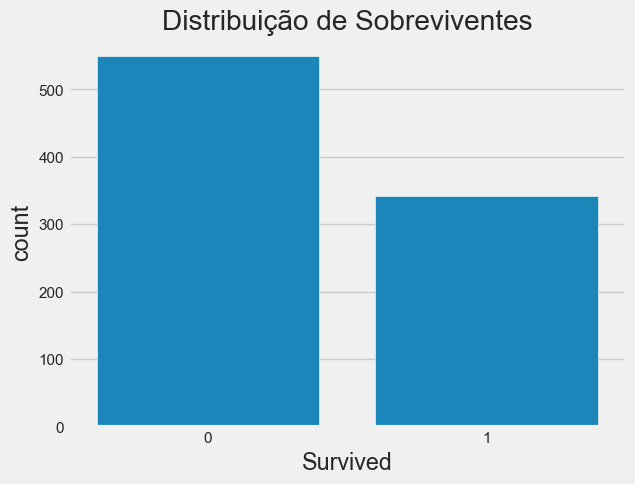

In [11]:
# Distribuição da coluna 'Survived'
print("\nDistribuição da coluna 'Survived':")
print(train_data['Survived'].value_counts())

# Visualizar a distribuição com um gráfico
sns.countplot(x='Survived', data=train_data)
plt.title("Distribuição de Sobreviventes")
plt.show()

### Analisar outras colunas importantes: Vamos explorar algumas colunas como Sex, Age, e Pclass (classe dos passageiros), que podem ter impacto na sobrevivência.


Distribuição por sexo:
Sex
male      577
female    314
Name: count, dtype: int64


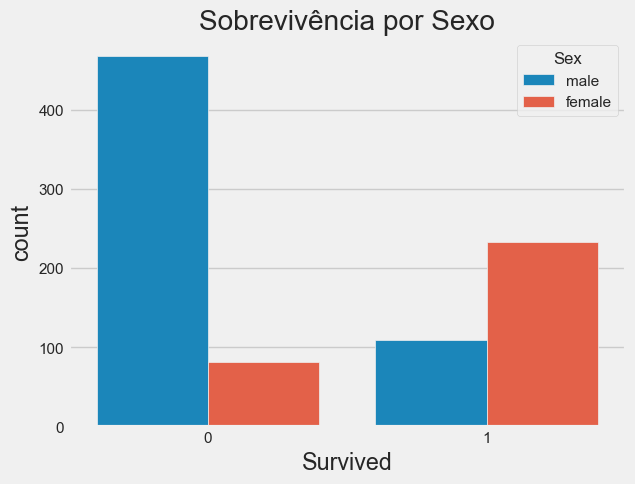


Distribuição por classe:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


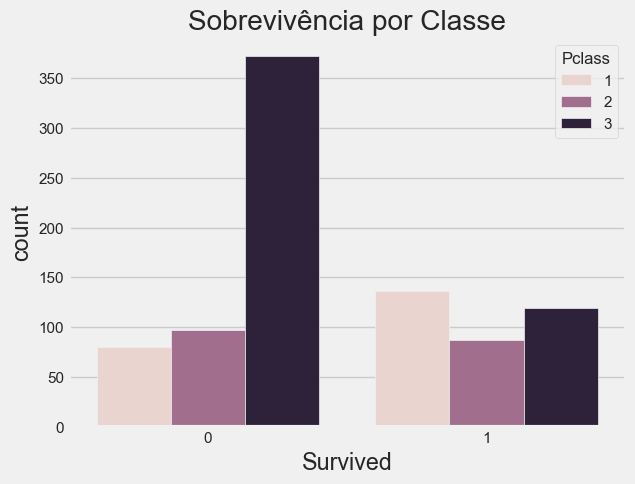

In [13]:
# Analisando a coluna 'Sex'
print("\nDistribuição por sexo:")
print(train_data['Sex'].value_counts())

# Visualizar sobrevivência por sexo
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title("Sobrevivência por Sexo")
plt.show()

# Analisando a coluna 'Pclass'
print("\nDistribuição por classe:")
print(train_data['Pclass'].value_counts())

# Visualizar sobrevivência por classe
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title("Sobrevivência por Classe")
plt.show()

###  Preparar os dados para o modelo
Agora que entendemos melhor os dados, precisamos tratá-los antes de treinar nosso modelo. Isso inclui:

Tratar valores ausentes: Algumas colunas podem ter valores ausentes (NaN). Vamos preencher ou descartar essas colunas, dependendo de sua importância.

In [15]:
# Verificar colunas com valores ausentes novamente
print("Valores ausentes no conjunto treino:")
print(train_data.isnull().sum())

# Exemplo: Preencher valores ausentes na coluna 'Age' com a mediana
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

# Preencher valores ausentes na coluna 'Embarked' com o valor mais frequente
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Se necessário, preencher valores ausentes na coluna 'Fare'
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

Valores ausentes no conjunto treino:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Remover a coluna 'Cabin' dos datasets
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

# Verificar as colunas restantes
print("Colunas restantes no train_data:", train_data.columns)
print("Colunas restantes no test_data:", test_data.columns)

Colunas restantes no train_data: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Colunas restantes no test_data: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


### Transformar colunas categóricas: Algumas colunas, como Sex e Embarked, são categóricas (texto) e precisam ser transformadas em números para que o modelo possa entendê-las.
Agora, precisamos lidar com as colunas que contêm valores categóricos, como Sex e Embarked, já que os modelos de Machine Learning geralmente trabalham melhor com números. Vamos convertê-las em variáveis numéricas:

Coluna Sex:
Converteremos male para 0 e female para 1.

Coluna Embarked:
Converteremos os valores C, Q, e S em números (por exemplo, C=0, Q=1, S=2).

In [19]:
# Converter 'Sex' para numérico: 0 = male, 1 = female
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Converter 'Embarked' em valores numéricos - C=0, Q=1, S=2
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [21]:
# Verificar as primeiras linhas do conjunto de treino
print(train_data[['Sex', 'Embarked']].head())

# Verificar se há valores ausentes após a transformação
print("\nValores ausentes em train_data:", train_data.isnull().sum())
print("\nValores ausentes em test_data:", test_data.isnull().sum())

   Sex  Embarked
0    0         2
1    1         0
2    1         2
3    1         2
4    0         2

Valores ausentes em train_data: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Valores ausentes em test_data: PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Próximo Passo: Criar Variáveis Derivadas (Feature Engineering)
Agora, vamos criar algumas variáveis derivadas que podem ajudar o modelo a entender melhor os dados. Essas variáveis são baseadas nas informações existentes, mas adicionam novas perspectivas. Aqui estão algumas ideias:



In [26]:
# Criar a variável FamilySize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Criar a variável IsAlone
train_data['IsAlone'] = 1 #Inicialmente considera que todos estão sozinhos
train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0 #Define como "não sozinho"

test_data['IsAlone'] = 1
test_data.loc[test_data['FamilySize'] > 1, 'IsAlone'] = 0

#Visualizar as novas colunas criadas
print(train_data[['FamilySize', 'IsAlone']].head())

   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


In [28]:
# Conferir os valores ausentes após as transformações
print("Valores ausentes em train_data:", train_data.isnull().sum())
print("Valores ausentes em test_data:", test_data.isnull().sum())

Valores ausentes em train_data: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64
Valores ausentes em test_data: PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64


### Preparar os Dados para o Modelo
Agora vamos preparar os dados para serem usados no treinamento do modelo de Machine Learning. Isso inclui:

Selecionar as colunas que serão usadas como features (variáveis preditoras):

Excluir colunas que não são úteis ou que podem atrapalhar, como Name, Ticket, PassengerId, etc.
Vamos usar colunas como Pclass, Sex, Age, Fare, Embarked, FamilySize, e IsAlone.

Separar os dados em variáveis preditoras (X) e variável alvo (y):

### A variável alvo é Survived, que indica se o passageiro sobreviveu ou não.
Preparar os dados de treino e teste:

O conjunto de treino será usado para treinar o modelo.
O conjunto de teste será usado para fazer previsões e avaliar o desempenho.

In [35]:
# Selecionar as colunas para o modelo
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']

# Dados de treino
x_train = train_data[features]
y_train = train_data['Survived']

# Dados de teste
x_test = test_data[features]

# Conferir as primeiras linhas para verificar
print("Dados de treino (x_train):")
print(x_train.head())

print("\nVariável alvo (y_train):")
print(y_train.head())

print("\nDados de teste (x_test):")
print(x_test.head())

Dados de treino (x_train):
   Pclass  Sex   Age     Fare  Embarked  FamilySize  IsAlone
0       3    0  22.0   7.2500         2           2        0
1       1    1  38.0  71.2833         0           2        0
2       3    1  26.0   7.9250         2           1        1
3       1    1  35.0  53.1000         2           2        0
4       3    0  35.0   8.0500         2           1        1

Variável alvo (y_train):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Dados de teste (x_test):
   Pclass  Sex   Age     Fare  Embarked  FamilySize  IsAlone
0       3    0  34.5   7.8292         1           1        1
1       3    1  47.0   7.0000         2           2        0
2       2    0  62.0   9.6875         1           1        1
3       3    0  27.0   8.6625         2           1        1
4       3    1  22.0  12.2875         2           3        0


### Treinar um Modelo de Machine Learning
Agora que os dados estão prontos, vamos treinar um modelo. 
Para começar, usaremos um modelo simples e poderoso: ### Árvore de Decisão. 
É fácil de entender e funciona bem para problemas iniciais como este.

In [42]:
# Importar o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
model = DecisionTreeClassifier(random_state=42) # random_state para reprodutibilidade

# Treinar o modelo com os dados de treino
model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(x_test)

# Visualizar algumas previsões
print("Previsões para os primeiros 10 passageiros do conjunto de teste:")
print(predictions[:10])

Previsões para os primeiros 10 passageiros do conjunto de teste:
[0 0 1 1 1 0 0 0 1 0]


### Salvar o Arquivo
Depois de criar o DataFrame, salvamos a tabela como um arquivo CSV

In [48]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

In [50]:
output.to_csv('submission.csv', index=False)

In [54]:
# Conta os valores únicos e suas respectivas frequências no array de previsões
unique, counts = np.unique(predictions, return_counts=True)

# Exibe os resultados
resultados = dict(zip(unique, counts))
print("Número de sobreviventes e não sobreviventes previstos:", resultados)

Número de sobreviventes e não sobreviventes previstos: {0: 239, 1: 179}
